In [1]:
# Import libraries that'll be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import h5py
import math
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
plt.rc('axes.formatter', useoffset = False)
plt.rc('text', usetex = True)
plt.rc('font', style  = 'normal')
plt.rc('font', **{'family': 'Times New Roman'})
ticksize = 5
plt.rc('xtick.major', size = ticksize);  plt.rc('ytick.major', size = ticksize)

In [2]:
print("Current working directory:", os.getcwd())

Current working directory: /Users/bxiao/Research/Quantum_Computing/Holographic_Quantum_Algorithms


In [3]:
goldenRatio = (5**.5 - 1) / 2.

### Analyze local observable e.g. $S_{z}$, spin correlation function $C_{zz}$ and overlap of wavefunctions

In [107]:
file = h5py.File("Data/Long_Range_Gate_Test.h5", "r")

In [108]:
file.keys()

<KeysViewHDF5 ['Sx1', 'Sx2', 'Sy1', 'Sy2', 'Sz1', 'Sz2', 'overlap', 'overlap1', 'overlap2']>

(20,)
(20,)
(20,)


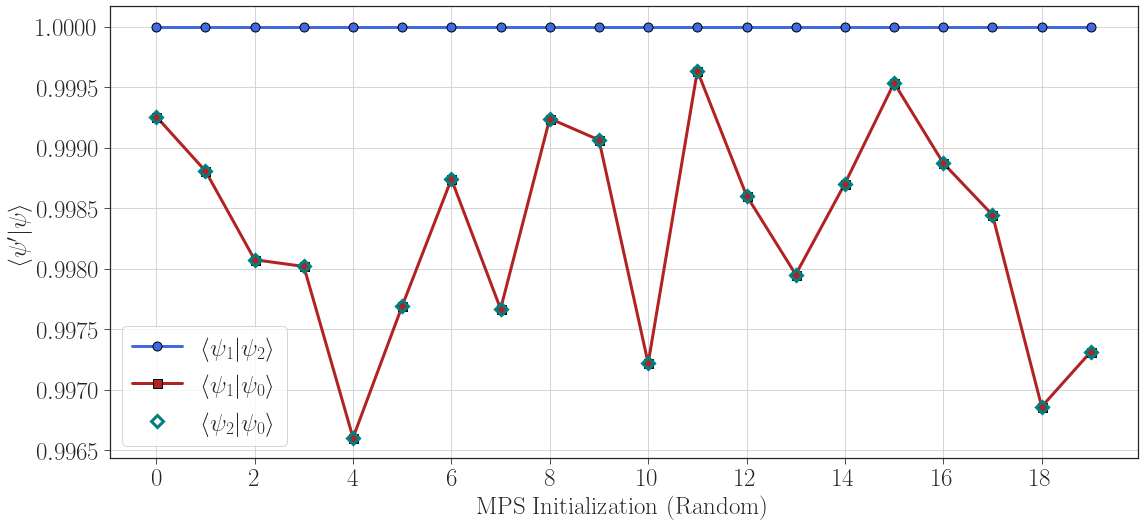

In [109]:
'''
    Plot the overlap of wavefunctions obtained by apply the long-range gate in two ways
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

ax1 = fig.add_subplot(spec[0, 0])
overlap  = np.array(file['overlap']); print(overlap.shape)
overlap1 = np.array(file['overlap1']); print(overlap1.shape)
overlap2 = np.array(file['overlap2']); print(overlap2.shape)

ax1.plot(np.arange(20), overlap,  linewidth = 3, color = 'royalblue', marker = 'o', markersize = 9, markeredgecolor = 'black', label = r'$\langle \psi_{1} | \psi_{2} \rangle$')
ax1.plot(np.arange(20), overlap1, linewidth = 3, color = 'firebrick', marker = 's', markersize = 9, markeredgecolor = 'black', label = r'$\langle \psi_{1} | \psi_{0} \rangle$')
ax1.plot(np.arange(20), overlap2, linewidth = 3, linestyle = '', marker = 'D', markersize = 9, markeredgewidth = 3, markeredgecolor = 'teal', markerfacecolor = 'none', label = r'$\langle \psi_{2} | \psi_{0} \rangle$')

ax1.set_xlabel(r'$\rm MPS \; Initialization \; (Random)$', fontsize = 25)
ax1.set_ylabel(r'$\langle \psi^{\prime} | \psi \rangle$', fontsize = 25)
ax1.set_xticks(np.arange(0, 20, 2))
ax1.tick_params(axis = "both", which = "major", labelsize = 25)
ax1.grid()
ax1.legend(frameon = True, fontsize = 25)
plt.savefig('Figures/Long_Range_Two_Site_Check_Wavefunction_Overlap.pdf')

(50, 20)
(50, 20)
(50, 20)


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python

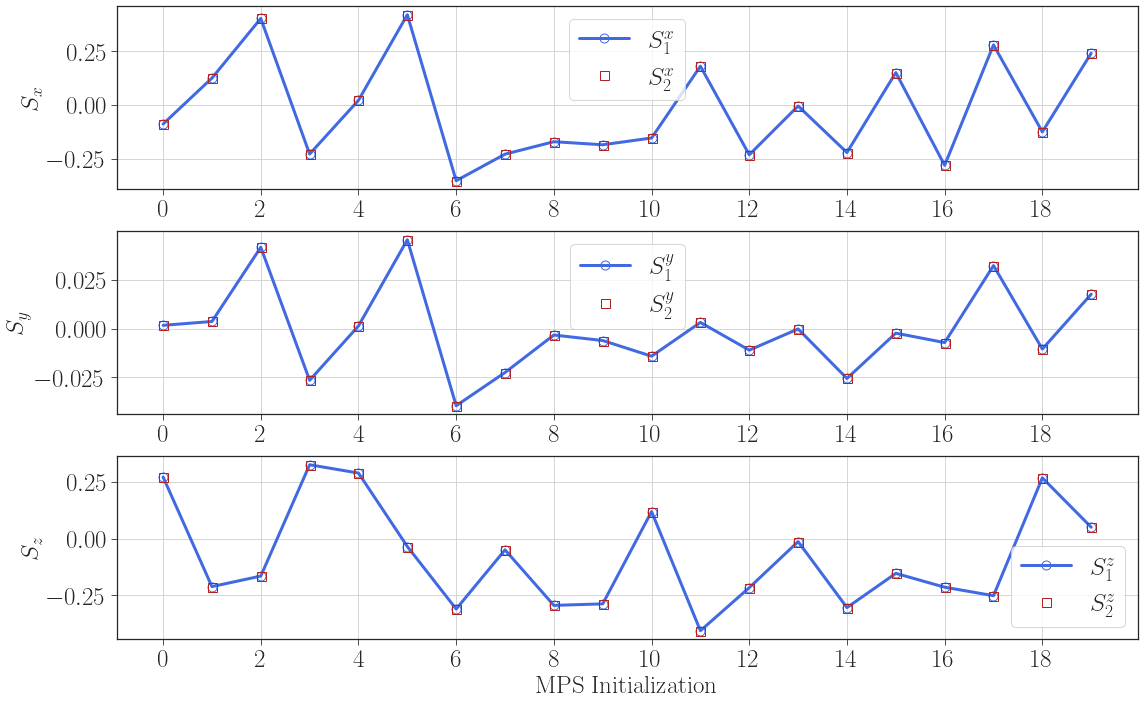

In [110]:
'''
    Plot the overlap of wavefunctions obtained by apply the long-range gate in two ways
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 3, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

tags = [['Sx1', 'Sx2'], ['Sy1', 'Sy2'], ['Sz1', 'Sz2']]
labels = [[r'$S^{x}_{1}$', r'$S^{x}_{2}$'], [r'$S^{y}_{1}$', r'$S^{y}_{2}$'], [r'$S^{z}_{1}$', r'$S^{z}_{2}$']]
ylabels = [r'$S_{x}$', r'$S_{y}$', r'$S_{z}$']

for ind in range(len(tags)):
    ax1 = fig.add_subplot(spec[ind, 0])
    tmp1, tmp2 = np.array(file[tags[ind][0]]), np.array(file[tags[ind][1]]); print(tmp1.shape)
    ax1.plot(np.arange(20), tmp1[0, :],  linewidth = 3, color = 'royalblue', marker = 'o', markersize = 9, \
             markeredgecolor = 'royalblue', markerfacecolor = 'none', label = labels[ind][0])
    ax1.plot(np.arange(20), tmp2[0, :], linestyle = " ", linewidth = 3, color = 'firebrick', marker = 's', markersize = 9, \
             markeredgecolor = 'firebrick', markerfacecolor = 'none', label = labels[ind][1]) 
    ax1.set_ylabel(ylabels[ind], fontsize = 25)
    ax1.set_xticks(np.arange(0, 20, 2))
    ax1.tick_params(axis = "both", which = "major", labelsize = 25)
    ax1.legend(frameon = True, fontsize = 25)
    ax1.grid()
ax1.set_xlabel(r'$\rm MPS\; Initialization$', fontsize = 25)

plt.savefig('Figures/Long_Range_Two_Site_Check_Spin_Components.pdf')

In [151]:
file = h5py.File("Data/Long_Range_Gate_Test_Time_Series_AF.h5", "r")

In [152]:
file.keys()

<KeysViewHDF5 ['Sx1', 'Sx2', 'Sy1', 'Sy2', 'Sz1', 'Sz2', 'overlap', 'overlap1', 'overlap2']>

(20,)
(20,)
(20,)


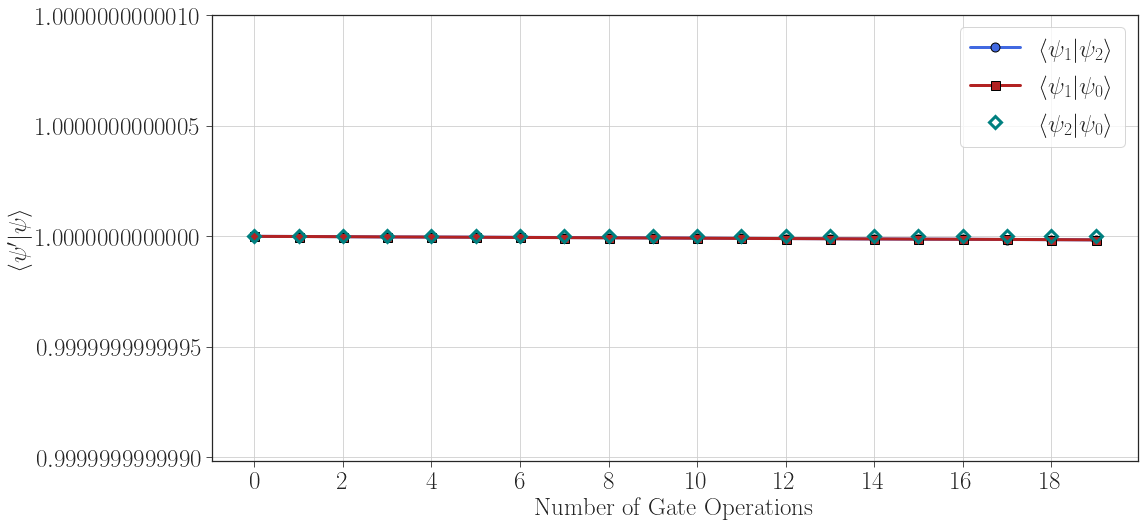

In [153]:
'''
    Plot the overlap of wavefunctions obtained by apply the long-range gate in two ways
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

ax1 = fig.add_subplot(spec[0, 0])
overlap  = np.array(file['overlap']); print(overlap.shape)
overlap1 = np.array(file['overlap1']); print(overlap1.shape)
overlap2 = np.array(file['overlap2']); print(overlap2.shape)

ax1.plot(np.arange(20), overlap,  linewidth = 3, color = 'royalblue', marker = 'o', markersize = 9, markeredgecolor = 'black', label = r'$\langle \psi_{1} | \psi_{2} \rangle$')
ax1.plot(np.arange(20), overlap1, linewidth = 3, color = 'firebrick', marker = 's', markersize = 9, markeredgecolor = 'black', label = r'$\langle \psi_{1} | \psi_{0} \rangle$')
ax1.plot(np.arange(20), overlap2, linewidth = 3, linestyle = '', marker = 'D', markersize = 9, markeredgewidth = 3, markeredgecolor = 'teal', markerfacecolor = 'none', label = r'$\langle \psi_{2} | \psi_{0} \rangle$')

ax1.set_xlabel(r'$\rm Number\; of\; Gate\; Operations$', fontsize = 25)
ax1.set_ylabel(r'$\langle \psi^{\prime} | \psi \rangle$', fontsize = 25)
ax1.set_xticks(np.arange(0, 20, 2))
ax1.tick_params(axis = "both", which = "major", labelsize = 25)
ax1.grid()
ax1.legend(frameon = True, fontsize = 25)

# plt.savefig('Figures/Long_Range_Two_Site_Check_Wavefunction_Overlap_Time_Series_AF.pdf')

(50, 20)
(50, 20)
(50, 20)


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python

Text(0.5, 0, '$\\rm Number\\; of\\; Gate\\; Operation$')

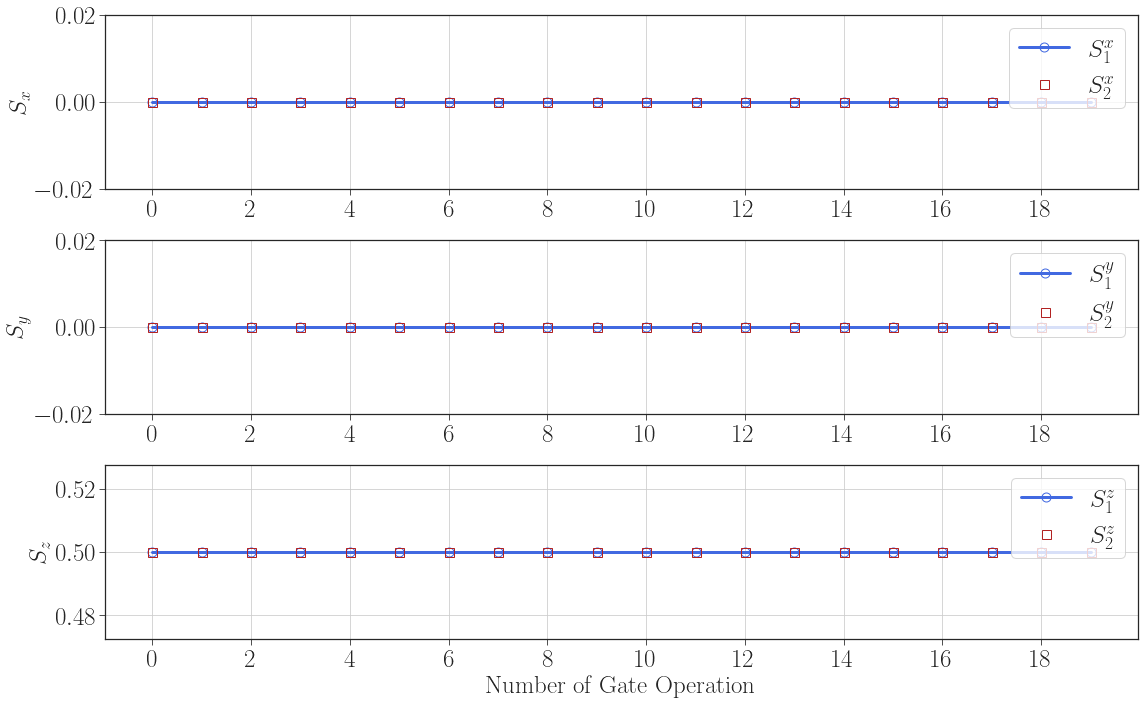

In [155]:
'''
    Plot the overlap of wavefunctions obtained by apply the long-range gate in two ways
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 3, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

tags = [['Sx1', 'Sx2'], ['Sy1', 'Sy2'], ['Sz1', 'Sz2']]
labels = [[r'$S^{x}_{1}$', r'$S^{x}_{2}$'], [r'$S^{y}_{1}$', r'$S^{y}_{2}$'], [r'$S^{z}_{1}$', r'$S^{z}_{2}$']]
ylabels = [r'$S_{x}$', r'$S_{y}$', r'$S_{z}$']

for ind in range(len(tags)):
    ax1 = fig.add_subplot(spec[ind, 0])
    tmp1, tmp2 = np.array(file[tags[ind][0]]), np.array(file[tags[ind][1]]); print(tmp1.shape)
    ax1.plot(np.arange(20), tmp1[0, :],  linewidth = 3, color = 'royalblue', marker = 'o', markersize = 9, \
             markeredgecolor = 'royalblue', markerfacecolor = 'none', label = labels[ind][0])
    ax1.plot(np.arange(20), tmp2[0, :], linestyle = " ", linewidth = 3, color = 'firebrick', marker = 's', markersize = 9, \
             markeredgecolor = 'firebrick', markerfacecolor = 'none', label = labels[ind][1]) 
    if ind != 2:
        ax1.set_ylim(-0.02, 0.02)
    ax1.set_ylabel(ylabels[ind], fontsize = 25)
    ax1.set_xticks(np.arange(0, 20, 2))
    ax1.tick_params(axis = "both", which = "major", labelsize = 25)
    ax1.legend(frameon = True, fontsize = 25)
    ax1.grid()

ax1.set_xlabel(r'$\rm Number\; of\; Gate\; Operation$', fontsize = 25)

# plt.savefig('Figures/Long_Range_Two_Site_Check_Spin_Components_Time_Series_AF.pdf')

In [144]:
file = h5py.File("Data/Sample_Test_Random.h5", "r")

In [145]:
file.keys()

<KeysViewHDF5 ['Sz']>

(20, 12)


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python

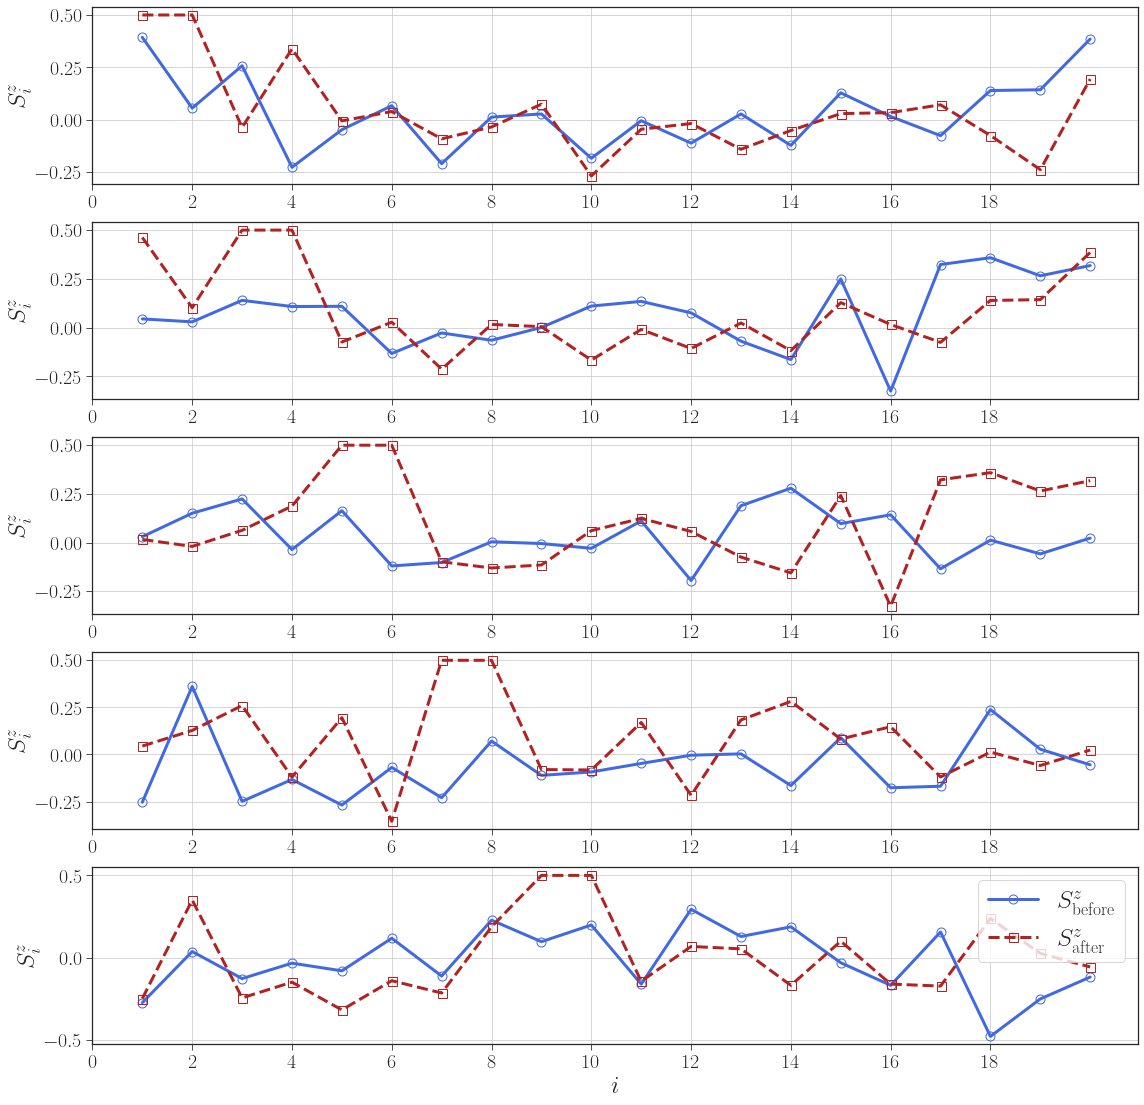

In [150]:
'''
    Plot the overlap of wavefunctions obtained by apply the long-range gate in two ways
'''

fig = plt.figure(figsize = (16, 25 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 5, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

Sz = np.array(file['Sz']); print(Sz.shape) 

for ind in range(1, 6):
    ax1 = fig.add_subplot(spec[ind - 1, 0])
    ax1.plot(np.arange(1, 21), Sz[:, 2 * ind],  linewidth = 3, color = 'royalblue', marker = 'o', markersize = 9, \
             markeredgecolor = 'royalblue', markerfacecolor = 'none', label = r'$S_{\rm before}^{z}$')
    ax1.plot(np.arange(1, 21), Sz[:, 2 * ind - 1], linestyle = "--", linewidth = 3, color = 'firebrick', marker = 's', markersize = 9, \
             markeredgecolor = 'firebrick', markerfacecolor = 'none', label = r'$S_{\rm after}^{z}$') 
    ax1.set_ylabel(r'$S_{i}^{z}$', fontsize = 25)
    ax1.set_xticks(np.arange(0, 20, 2))
    ax1.tick_params(axis = "both", which = "major", labelsize = 20)
    ax1.grid()
    
ax1.set_xlabel(r'$i$', fontsize = 25)
ax1.legend(frameon = True, fontsize = 25)

plt.savefig('Figures/Sampling_Sz_Random.pdf')